### Student Information
Name: 邱逸庭

Student ID: 110070071

GitHub ID: Eric0801

Kaggle name: eating chew

Kaggle private scoreboard snapshot:

![private scoreboard](/Users/chiuyiting/Documents/GitHub/DM2024-Lab2-Homework/img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

## Part 1 - Take home exercise

In [13]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

#### Exercise 1

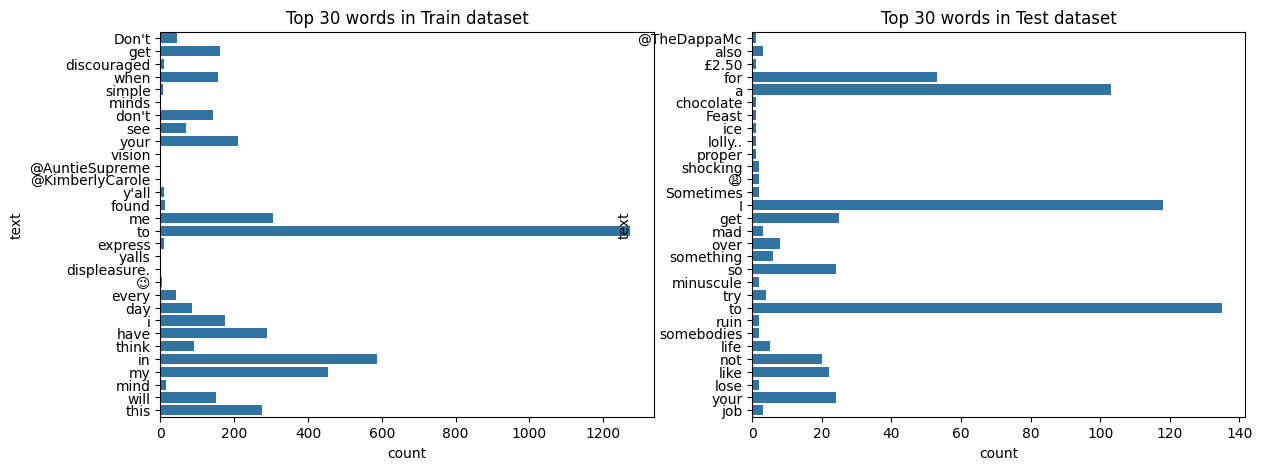

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Counter

# Answer here
top30_train = train_df.head(30)
top30_test = test_df.head(30)

# word frequency
train_text_list = [word for text in train_df['text'] for word in text.split()]
test_text_list = [word for text in test_df['text'] for word in text.split()]

# create a dictionary with word frequencies
train_word_freq = dict(Counter(train_text_list))
test_word_freq = dict(Counter(test_text_list))

# convert dictionary to dataframe
train_word_freq_df = pd.DataFrame(list(train_word_freq.items()), columns=['text', 'count'])
test_word_freq_df = pd.DataFrame(list(test_word_freq.items()), columns=['text', 'count'])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x='count', y='text', data=train_word_freq_df.head(30), ax=ax1)
sns.barplot(x='count', y='text', data=test_word_freq_df.head(30), ax=ax2)
ax1.set_title('Top 30 words in Train dataset')
ax2.set_title('Top 30 words in Test dataset')
plt.show()

---

In [15]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# add .toarray() to show
train_data_BOW_features.toarray()
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [17]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
train_data_BOW_features_500.toarray()
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

/Users/chiuyiting/Library/Python/3.11/lib/python/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

### Exercise 2 

In [18]:
### Begin Assignment Here
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (bag-of-words)
tfidf_1000= TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

# check dimension
train_data_tfidf_features_1000.shape

train_data_tfidf_features_1000.toarray()

# observe some feature names
feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---

### Exercise 3

#### Answer
The confusion matrix shows how well the model predicts emotions (Anger, Fear, Joy, Sadness). Correct predictions are along the diagonal, with Fear having the highest correct predictions (76). Misclassifications are off-diagonal, like Anger misclassified as Fear (18 times).

---

### Exercise 4 

- prerequisites for this NB classifier

In [19]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
# Answer here
from sklearn.naive_bayes import MultinomialNB

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)



## predict!
y_train_pred_nb =nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

y_test_pred_nb[:10]


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


array(['fear', 'sadness', 'anger', 'anger', 'joy', 'fear', 'fear', 'fear',
       'sadness', 'sadness'], dtype='<U7')

- Evaluation

In [20]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---

### Exercise 5 

#### Answer

#### Summary of Results
- **Accuracy**: Naive Bayes outperforms Decision Tree (70% vs. 68%).
- **Precision and Recall**: 
  - Naive Bayes shows higher precision, especially for fear and joy, indicating more reliable predictions.
  - Decision Tree has balanced recall but lower precision for some classes, like anger.

#### Theoretical Explanation

1. **Model Assumptions**:
   - Naive Bayes assumes feature independence, which can benefit performance when this holds true.
   - Decision Trees can capture complex interactions but may overfit to noise.

2. **Data Handling**:
   - Naive Bayes is robust with high-dimensional data and less prone to overfitting.
   - Decision Trees may struggle with small or noisy datasets.

3. **Class Imbalance**:
   - Naive Bayes performs better in precision across most classes, while Decision Tree performance varies significantly.

Overall, the Naive Bayes classifier demonstrates slightly better performance in accuracy and precision for this dataset, making it a more suitable choice given the characteristics of the data.

---

### Exercise 6

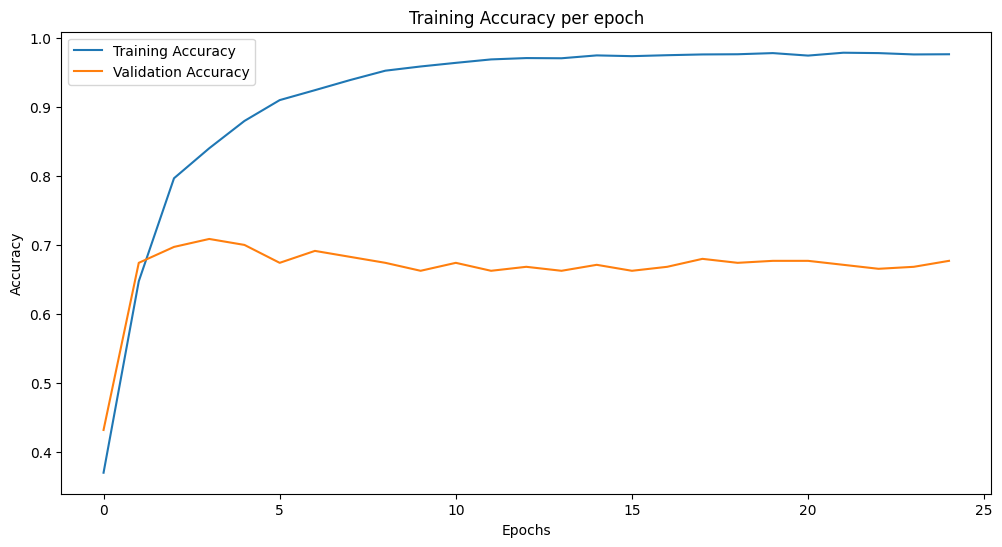

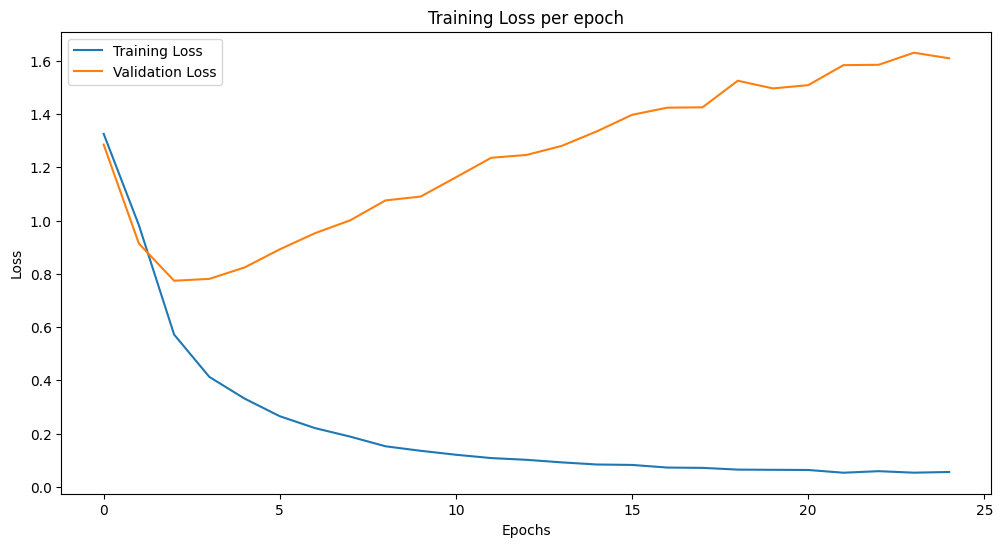

In [21]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


---

### Exercise 7 

##### Answer here

1. Use the average vector of all words in the sentence as the sentence vector.

2. Use the average vector of all words in the sentence, but only consider the words that have a high word2vec similarity score (e.g., cosine similarity > 0.5) with the target word.

---

In [22]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

### Exercise 8 

#### Answer
The result of the UMAP and t-SNE is quite different. The general distribution is the same, but somehow, the UMAP clustering density way higher than the t-SNE. Because t-SNE is better at capturing the local relationship of how the nearby points interacts but cause the global arrangements of data points is its main drawback.k. On the other hand, UMAP is better at capturing the global structure of the data but it is not as good at capturing the local relationship of how the nearby points interact. 

In [23]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

#### Plot for t-SNE

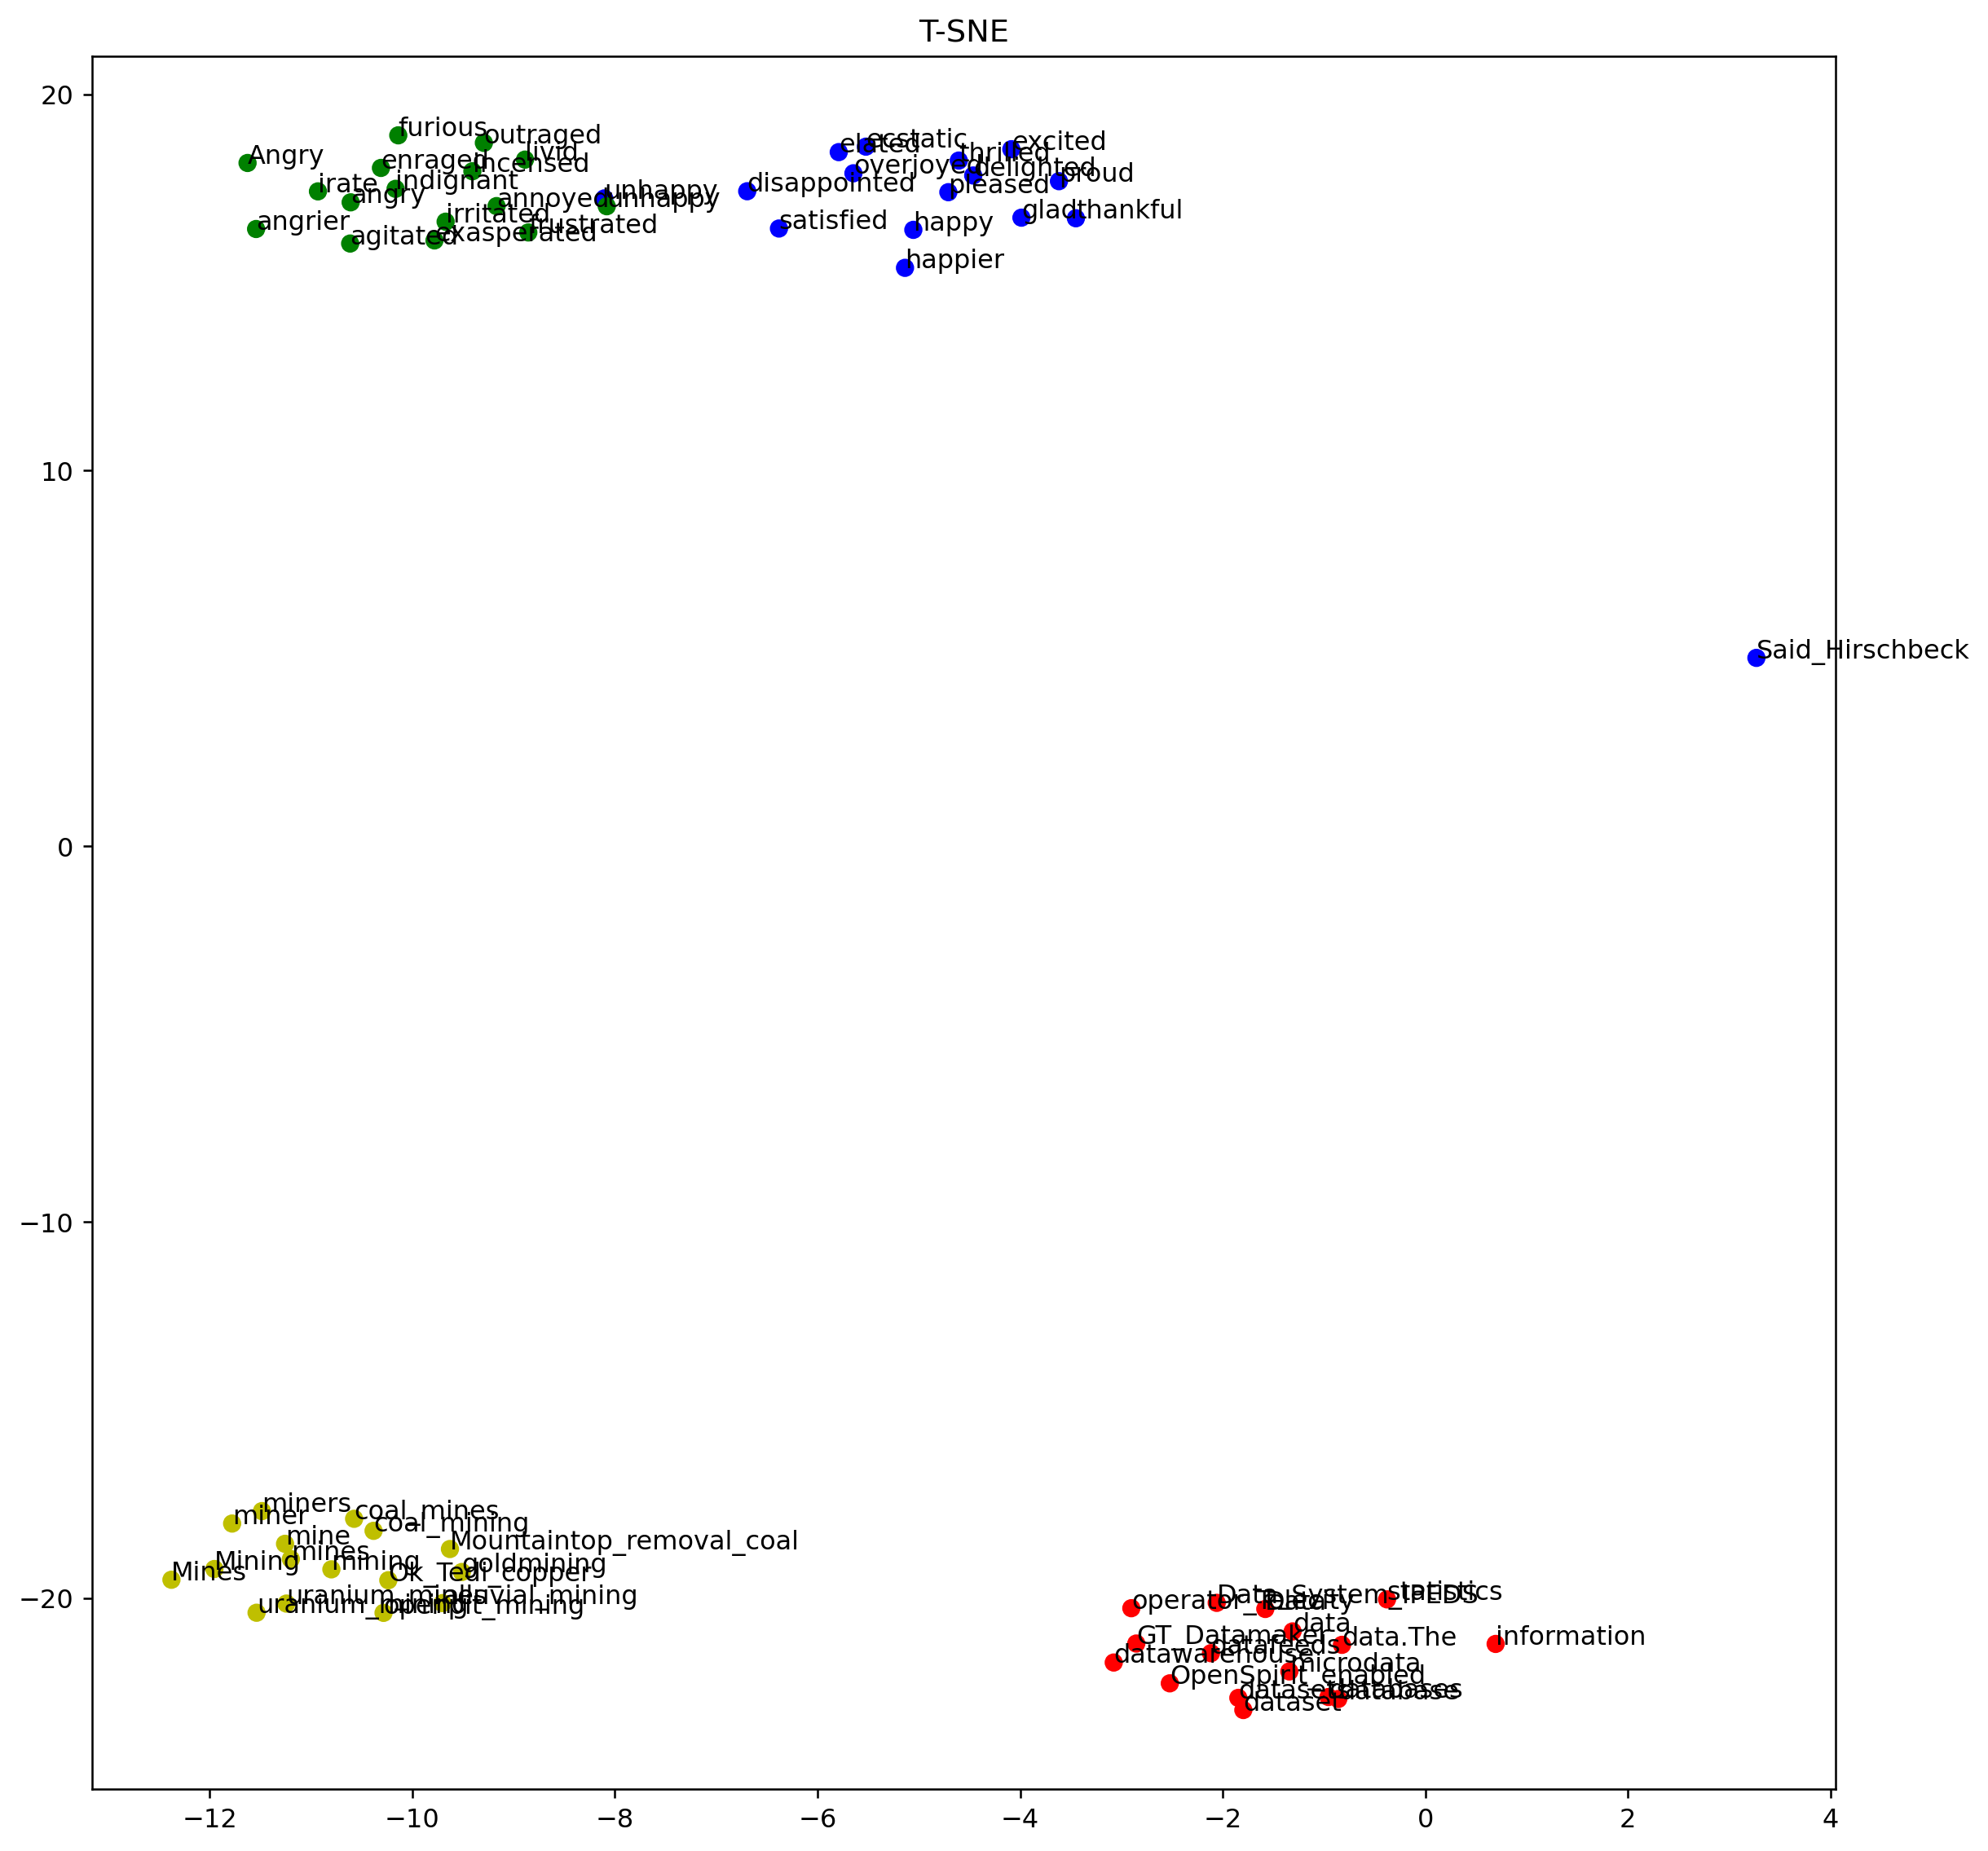

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(12, 12), dpi=230)
plt.title("T-SNE")
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#### Plot for UMAP

/Users/chiuyiting/Library/Python/3.11/lib/python/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


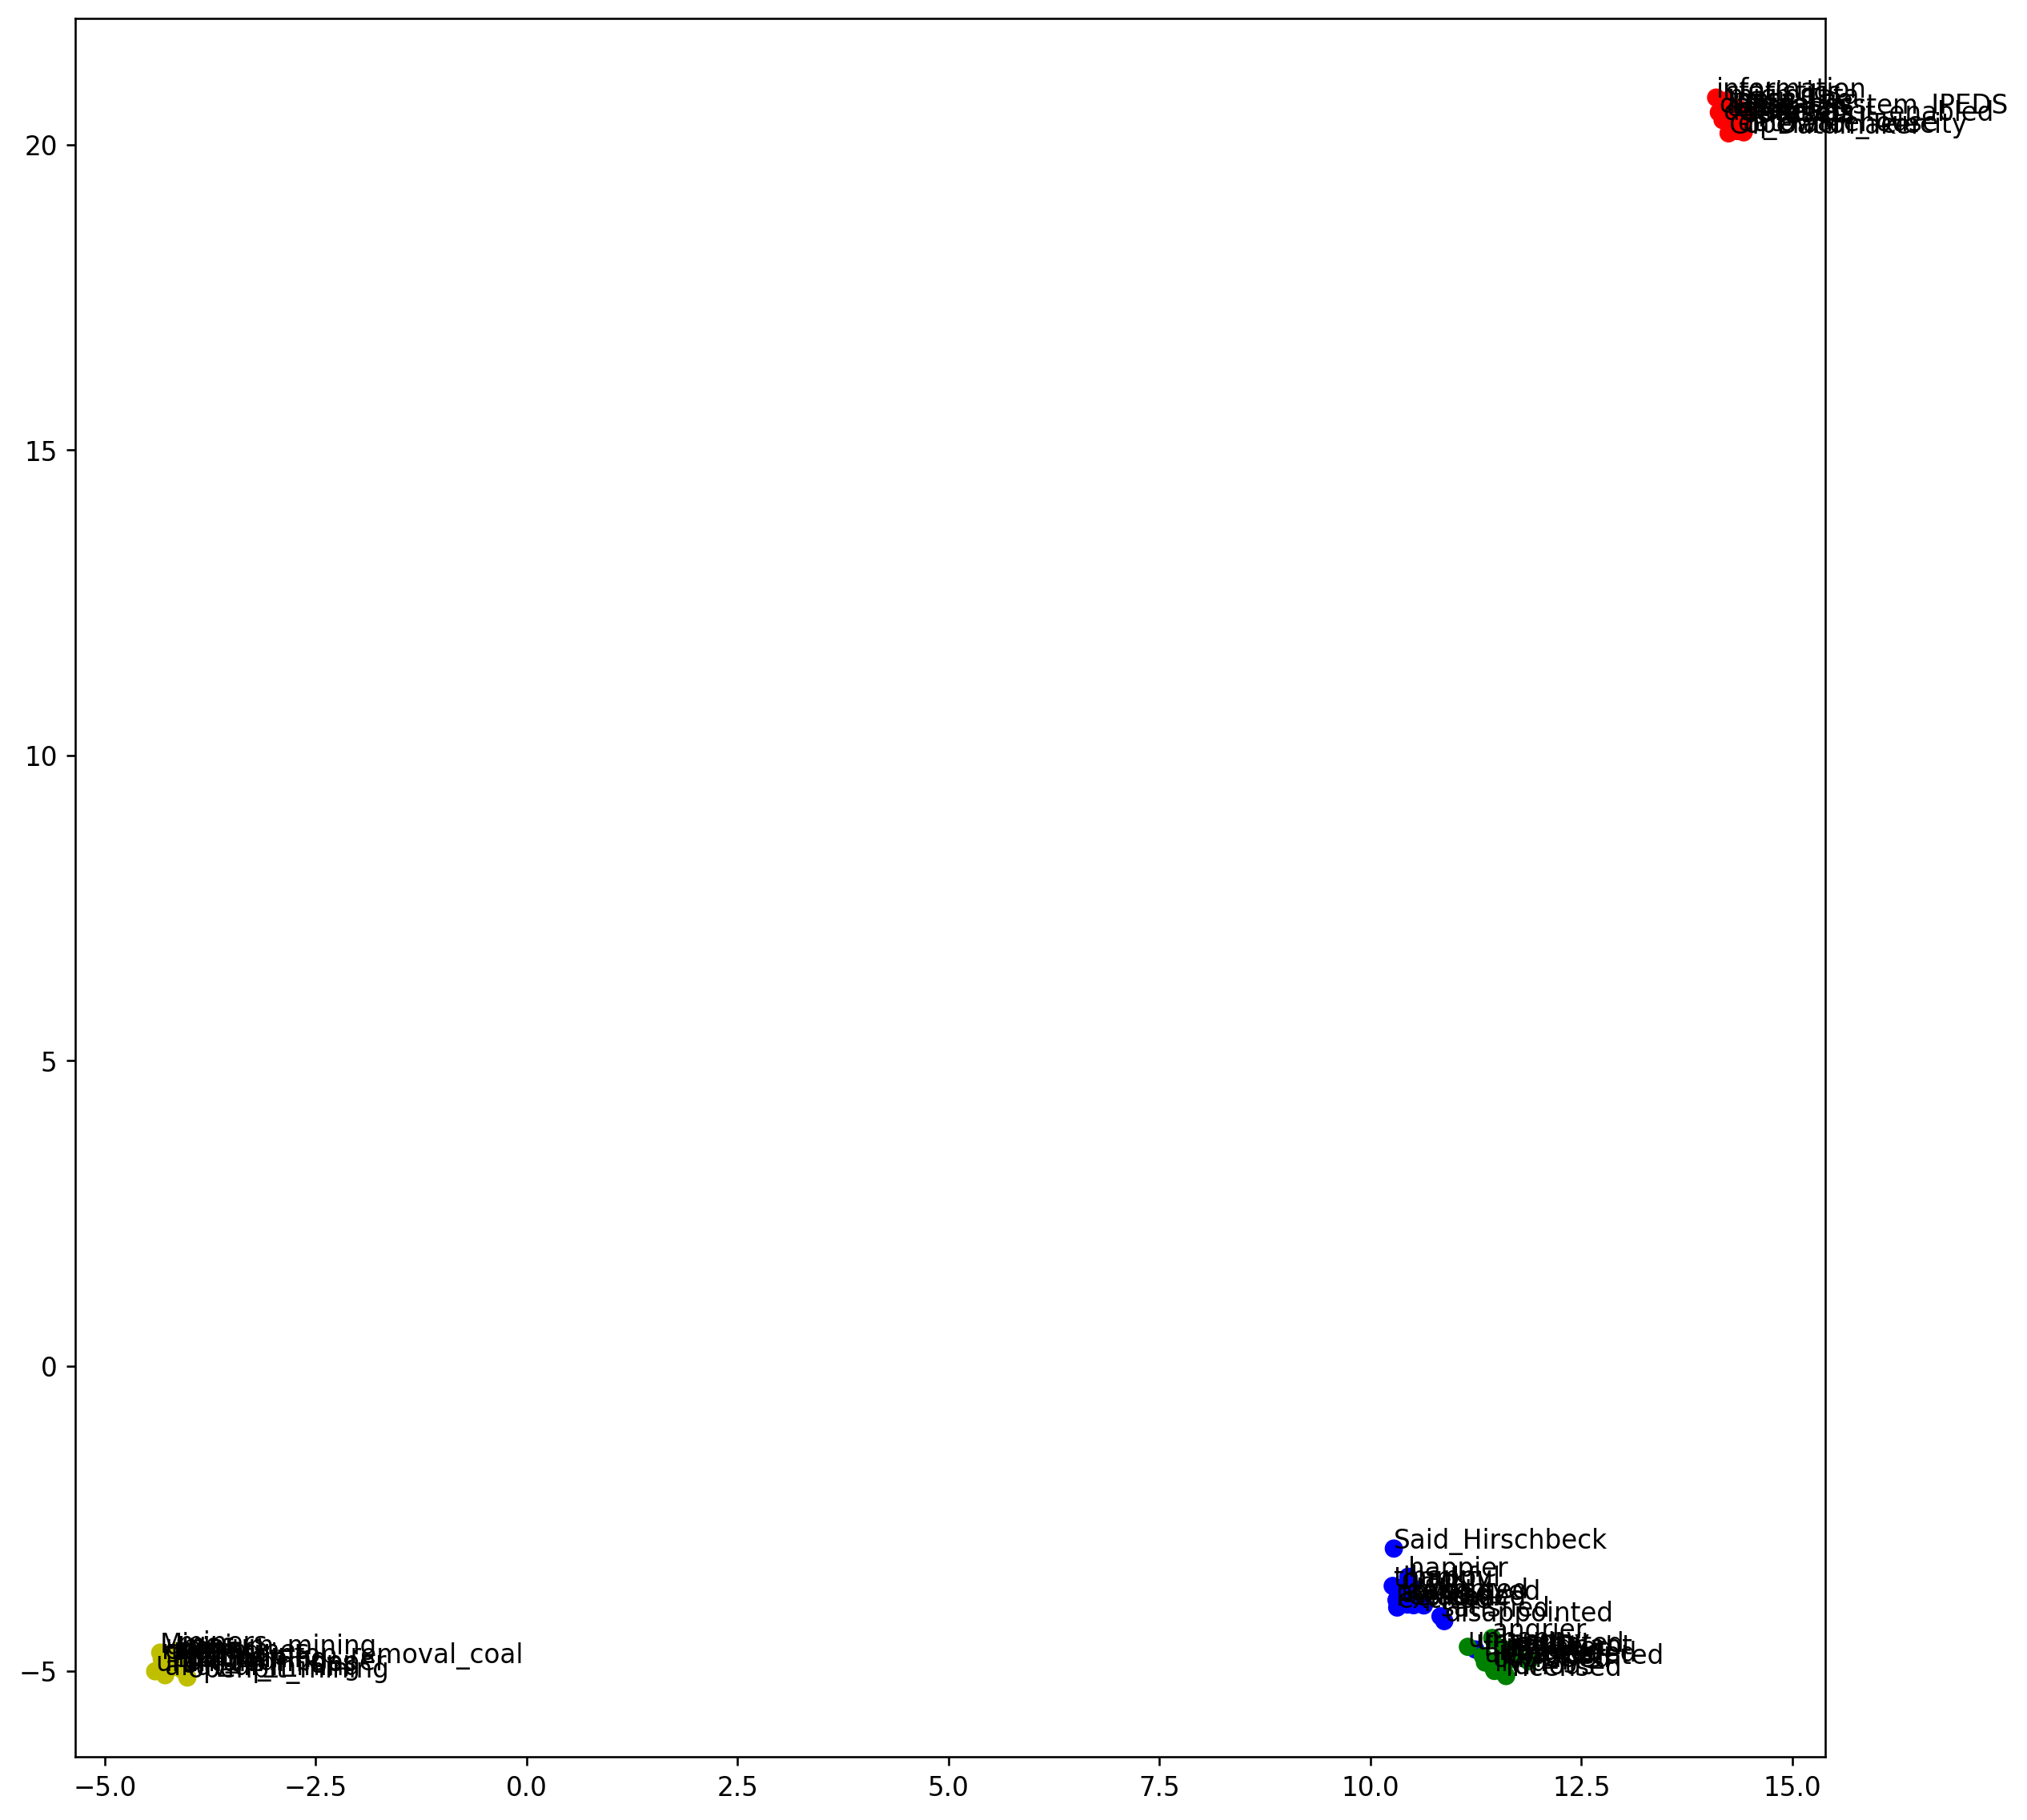

In [25]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(12, 12), dpi=235)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---

### Exercise 9

In [26]:
# Answer here

import ollama 

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'What is the role assistant? (in markdown format)'
    },
])

print(response['message']['content'])

 ### Role Assistant
#### Overview
A role assistant is a tool designed to support and automate specific tasks or functions within an organization. They are typically AI-powered bots that use natural language processing (NLP) to understand and respond to user queries.

### Key Features of Role Assistants

*   **Task Automation**: Role assistants can automate repetitive tasks, freeing up human workers to focus on more complex and high-value tasks.
*   **24/7 Support**: Role assistants provide around-the-clock support, ensuring that users can get help whenever they need it.
*   **Personalization**: Role assistants can be personalized to meet the specific needs of different teams or departments within an organization.

### Benefits of Using Role Assistants

*   **Increased Productivity**: By automating routine tasks, role assistants can help increase productivity and efficiency within organizations.
*   **Improved Customer Experience**: Role assistants can provide fast and accurate support 

---

### Exercise 10 

In [27]:
import ollama
from IPython.display import display, Markdown, Latex
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/dogge.jpg'] #Image with the dogge
    },
])

display(Markdown(response3['message']['content']))

In the center of the image, a Shiba Inu dog with a tan coat and black eyes commands attention. The dog's head is tilted slightly to the left, adding a sense of curiosity or interest to its demeanor. Its nose, a shade darker than its coat, stands out against the light beige color of the background.

The background itself is uncluttered, featuring only two items: a yellow blanket and a wooden block. The yellow blanket adds a pop of color to the otherwise neutral palette, while the wooden block provides a touch of texture. Despite their simplicity, these elements contribute to creating a homely atmosphere in the image.

Overall, the image captures a moment of quiet curiosity on the part of a Shiba Inu dog, set against a simple and uncluttered background.

!['dogge.jpg'](./pics/dogge.jpg)

""" The result is correct. The given image is Doge, in which does include a shiba inu. The model is able to identify the breed of the dog correctly. """ 

---

### Exercise 11

In [28]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.
/var/folders/qy/shpgz3tx3b7_pt2vwgy9hv940000gn/T/ipykernel_1601/3929822569.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


IBM's related solutions with Large Language Models (LLMs) include:

1. Watson Assistant: A conversational AI platform that uses LLMs to generate human-like responses to user queries.
2. Watson Orchestrate: A workflow automation platform that leverages LLMs for process automation and optimization.
3. Granite model series on watsonx.ai: A generative AI backbone for various IBM products, including the ones mentioned above.

These solutions demonstrate IBM's commitment to leveraging LLMs for natural language understanding (NLU) and natural language processing (NLP) capabilities, as well as their integration with other AI technologies.

---

### Exercise 12

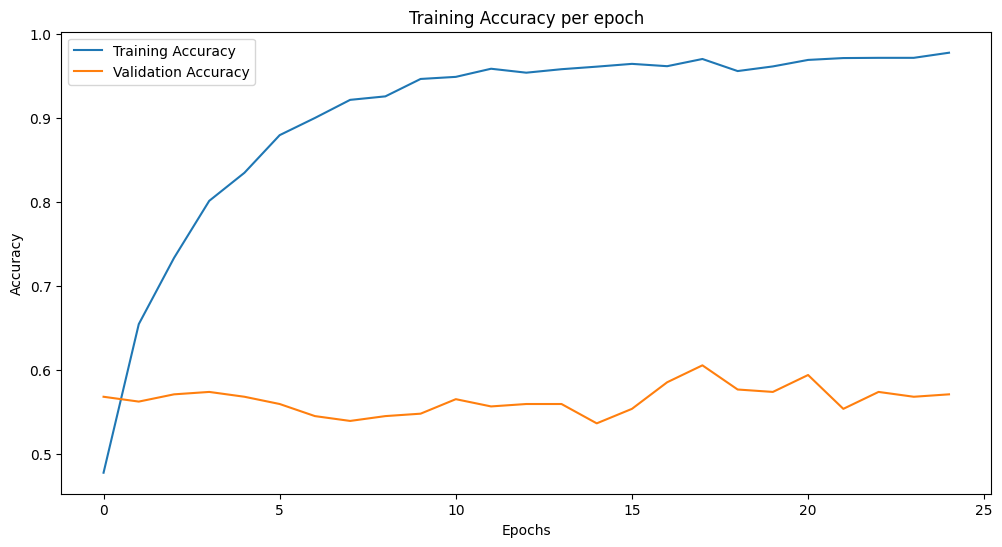

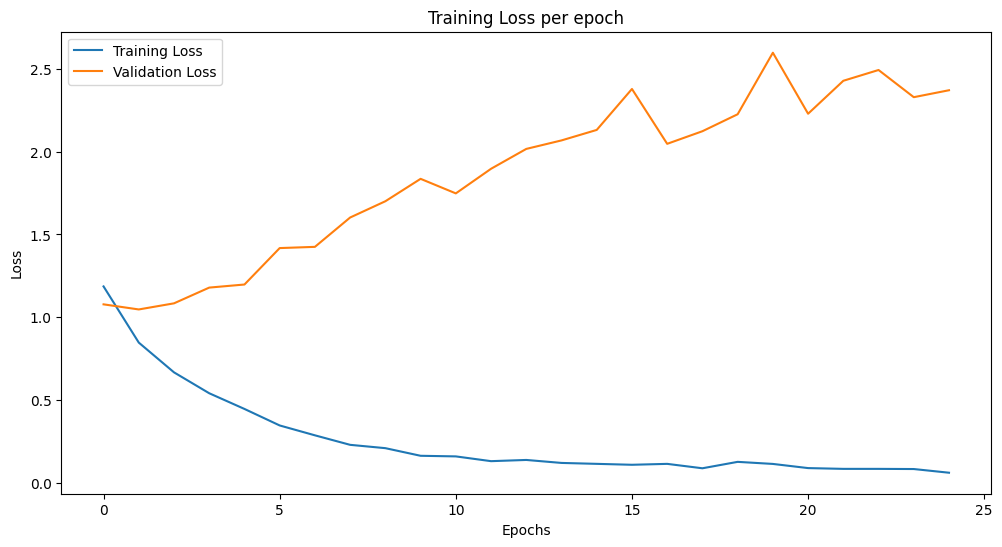

In [31]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

training_log_2 = pd.DataFrame()
training_log_2 = pd.read_csv("logs/training_log_2.csv")

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(training_log_2['epoch'], training_log_2['accuracy'], label='Training Accuracy')
plt.plot(training_log_2['epoch'], training_log_2['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(training_log_2['epoch'], training_log_2['loss'], label='Training Loss')
plt.plot(training_log_2['epoch'], training_log_2['val_loss'], label='Validation Loss')
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


---

### Exercise 13

#### Answer
We can see a clear improvement on accuracy from 0-shot to 1-shot, and 5-shot; from 43.65% to 51.25%. The number of True positive results on the diagonal of each confusion matrix also reflects a increasing trend. Which indicate that with more examples given to the LLM to refer, the better the results the LLM can generate.

For example, if we not give any hint for the LLM; That is, zero-shot. The result of "fear" is awful. But later we can see that the result of "fear" is improve with more samples given. Despite the result is still far from satisfaction.

---

## Part 2

#### This part is on kaggle!!

## Part 3

#### **Import Data**

In [ ]:
#load dependencies
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Read Data

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = []
with open('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
f.close()

/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json
/kaggle/input/dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv
/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv


NameError: name 'json' is not defined

In [ ]:
# Extract columns like 
df = pd.DataFrame(data)
_source = df['_source'].apply(lambda x: x['tweet'])
df = pd.DataFrame({
    'tweet_id': _source.apply(lambda x: x['tweet_id']),
    'hashtags': _source.apply(lambda x: x['hashtags']),
    'text': _source.apply(lambda x: x['text']),
})

In [ ]:
# Read the rest CSV
emotion = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
data_identification = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')

## Data Preprocessing

In [ ]:

# Merge datasets to include identifiers and emotion labels where applicable
df = pd.merge(df, data_identification, on='tweet_id', how='left')

# Split the dataset into training and testing based on the 'identification' column
train_data = df.query("identification == 'train'")
test_data = df.query("identification == 'test'")

# Integrate emotion labels with the training dataset
train_data = pd.merge(train_data, emotion, on='tweet_id', how='left')

# Remove duplicate texts from the training set for cleaner data
train_data = train_data.drop_duplicates(subset='text', keep=False)

# Randomly sample 20% of the training dataset for model training
train_sample = train_data.sample(frac=0.2, random_state=42)

# Extract text (features) and emotion (target) from the sampled dataset
X_train_raw = train_sample['text']
y_train_raw = train_sample['emotion']

## Feature Engineering

In [ ]:
# Split training data into training and validation sets with stratified sampling
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_train_raw, y_train_raw, test_size=0.2, random_state=42, stratify=y_train_raw
)

# Convert text data to numerical features using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()
X_test = tfidf_vectorizer.transform(X_test_raw).toarray()

## Label Encoding

In [ ]:
# Map emotion categories to numerical labels for model training
from sklearn.preprocessing import LabelEncoder
LabelEncode = LabelEncoder()
y_train = LabelEncode.fit_transform(y_train)
y_test = LabelEncode.transform(y_test)

## Training Model (Random_Forest)


In [ ]:
# Initialize and train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

## Model Prediction 

In [ ]:
# Predict on validation set and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = RF.predict(X_test)
val_accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Prepare test data by transforming its text features with the trained TF-IDF vectorizer
X_test_raw = test_data['text']
X_test = tfidf_vectorizer.transform(X_test_raw).toarray()

# Predict emotions for the test data
y_test_pred = RF.predict(X_test)
y_test_labels = LabelEncode.inverse_transform(y_test_pred)


# Save the Dataframe in specific format
result_df = pd.DataFrame({
    'id': test_data['tweet_id'],
    'emotion': y_test_labels
})

# Save predictions
result_df.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
# Predict on validation set and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = RF.predict(X_test)
val_accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Prepare test data by transforming its text features with the trained TF-IDF vectorizer
X_test_raw = test_data['text']
X_test = tfidf_vectorizer.transform(X_test_raw).toarray()

# Predict emotions for the test data
y_test_pred = RF.predict(X_test)
y_test_labels = LabelEncode.inverse_transform(y_test_pred)


# Save the Dataframe in specific format
result_df = pd.DataFrame({
    'id': test_data['tweet_id'],
    'emotion': y_test_labels
})

# Save predictions
result_df.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
submission.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,joy
33,0x26289a,joy
